In [1]:
import pandas as pd
datos=pd.read_csv('titanic.csv')

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

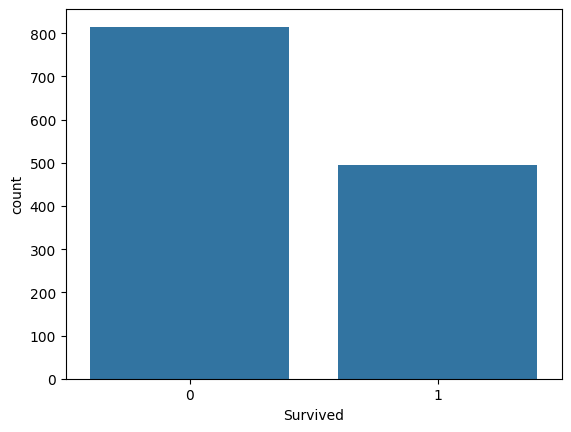

In [4]:
import seaborn as sb 
sb.countplot(x='Survived',data=datos)

<Axes: xlabel='Survived', ylabel='count'>

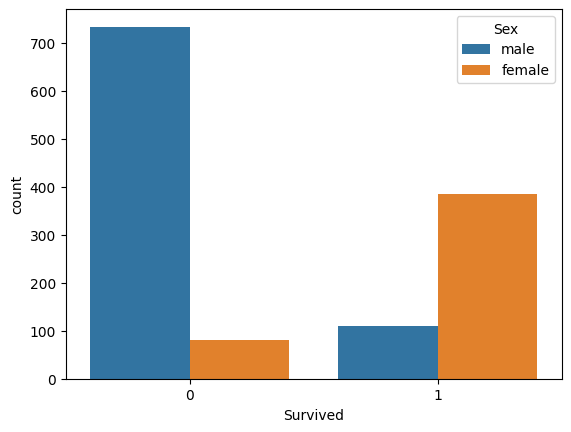

In [5]:
import seaborn as sb 
sb.countplot(x='Survived',data=datos,hue="Sex")

Ver datos vacios

In [7]:
datos.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Gráfico de distribución

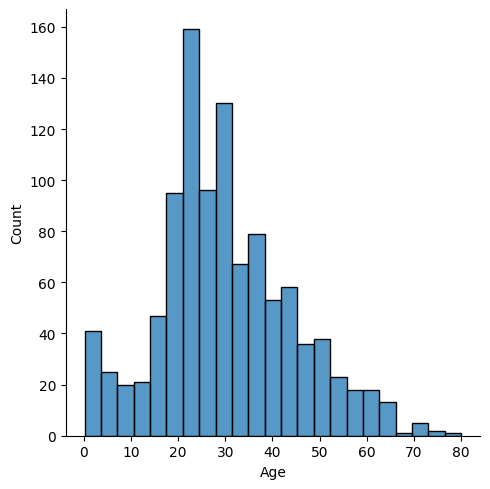

In [8]:
sb.displot(x='Age',data=datos)

In [11]:
datos['Age'].mean()

29.881137667304014

llenar datos vacios

In [12]:
datos['Age'].fillna(datos['Age'].mean(),inplace=True)

In [18]:
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Quitar cabina y datos vacios

In [15]:
datos.drop('Cabin',axis=1,inplace=True) 

In [17]:
datos.dropna(inplace=True)

Quitar datos no relevantes

In [19]:
datos.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [45]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [36]:
dummies_sex=pd.get_dummies(datos["Sex"],drop_first=True, dtype=int)

In [41]:
datos.drop(["Sex_Male"],axis=1,inplace=True)



KeyError: "['Sex_Male'] not found in axis"

<Axes: xlabel='Survived', ylabel='count'>

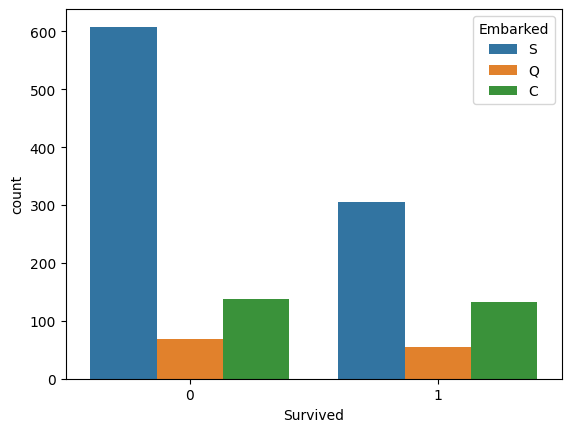

In [42]:
sb.countplot(x='Survived',data=datos,hue="Embarked")

In [43]:
dummies_embarked=pd.get_dummies(datos["Embarked"],drop_first=True, dtype=int)

In [44]:
datos=datos.join(dummies_embarked)
datos=datos.drop(["Embarked"],axis=1)

In [48]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True, dtype=int)
dummies_sex.rename(columns={"male": "Sex_Male"}, inplace=True)
datos = datos.join(dummies_sex)
datos.drop(["Sex"], axis=1, inplace=True)


<Axes: >

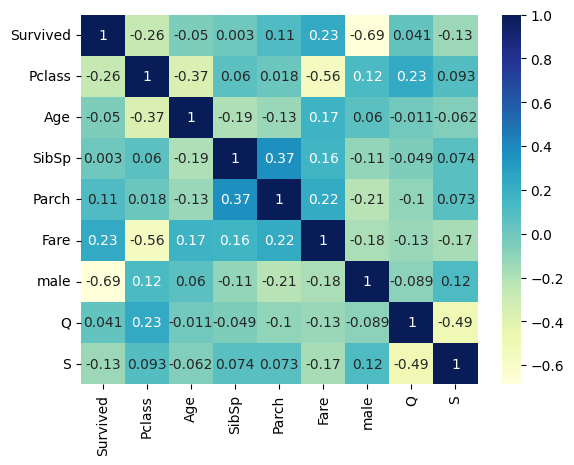

In [51]:

sb.heatmap(datos.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

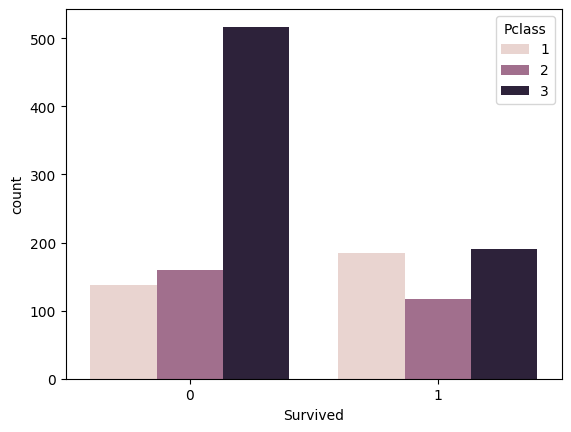

In [52]:
sb.countplot(x='Survived',data=datos,hue="Pclass")

In [53]:
x=datos.drop("Survived",axis=1)
y=datos["Survived"]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression(max_iter=1000)
modelo.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [57]:
predicciones=modelo.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicciones)

0.8320610687022901

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       167
           1       0.83      0.67      0.74        95

    accuracy                           0.83       262
   macro avg       0.83      0.80      0.81       262
weighted avg       0.83      0.83      0.83       262



In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predicciones))

[[154  13]
 [ 31  64]]


In [61]:
pd.DataFrame(confusion_matrix(y_test,predicciones),columns=["Prediccion 0","Prediccion 1"],index=["Real 0","Real 1"])

,Prediccion 0,Prediccion 1
Real 0,154,13
Real 1,31,64


In [62]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [68]:
nueva_personas=[1,35,0,0,80,0,0,0]
predicciones=modelo.predict([nueva_personas])
if predicciones[0]==1:
    print("Sobrevive")
else:
    print("No sobrevive")

Sobrevive


c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
